## Метод главных компонент

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
features = pd.DataFrame(X, columns=iris.feature_names)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
features.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
target = pd.DataFrame(iris.target, columns=['Class'])
target.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [7]:
target.value_counts()

Class
0        50
1        50
2        50
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [12]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [13]:
y_pred = classifier.predict(X_test_st)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.8666666666666667

для 1 компоненты

In [18]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=1)
X_train_st_c1 = pca_1.fit_transform(X_train_st)
X_test_st_c1 = pca_1.transform(X_test_st)

In [19]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_c1, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [20]:
y_pred = classifier.predict(X_test_st_c1)

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  3,  8]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.8333333333333334

для двух компонент

In [24]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_train_st_c2 = pca_2.fit_transform(X_train_st)
X_test_st_c2 = pca_2.transform(X_test_st)

In [25]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_c2, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [26]:
y_pred = classifier.predict(X_test_st_c2)

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 0, 0],
       [0, 7, 5],
       [0, 5, 6]], dtype=int64)

In [28]:
accuracy_score(y_test, y_pred)

0.6666666666666666

## Отбор признаков путем удаления высокоскоррелированных признаков

In [36]:
col_names = ['pregrant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pim = pd.read_csv('diabetes.csv', skiprows=1, names=col_names)
pim.head()

,pregrant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
X = pim.drop('label', axis=1)
y = pim['label']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [39]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[92,  5],
       [38, 19]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.7207792207792207

#### Понижение размерности

In [43]:
corr = X.corr().abs()

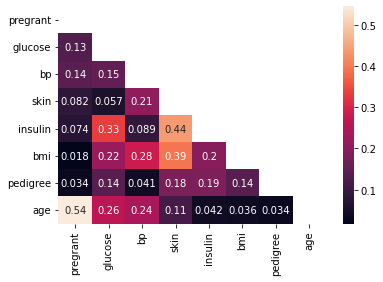

In [46]:
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g');

In [47]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
upper

,pregrant,glucose,bp,skin,insulin,bmi,pedigree,age
pregrant,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
bp,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
skin,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
bmi,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
pedigree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
to_drop = [column for column in upper.columns if any(upper[column]>0.4)]
to_drop

['insulin', 'age']

In [50]:
X = X.drop(to_drop, axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [52]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  7],
       [35, 22]], dtype=int64)

In [55]:
accuracy_score(y_test, y_pred)

0.7272727272727273

## Самостоятельная часть

In [56]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
X = df.drop('output', axis=1)
y = df['output']

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [60]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [61]:
y_pred = classifier.predict(X_test_st)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 13],
       [ 4, 27]], dtype=int64)

In [144]:
f1_score(y_test, y_pred)

0.7605633802816901

для 1 компоненты

In [65]:
df.shape

(303, 14)

In [68]:
from sklearn.metrics import f1_score
components = list(range(1, 14))
scores = []
for c in components:
    pca_1 = PCA(n_components=c)
    X_train_st_c1 = pca_1.fit_transform(X_train_st)
    X_test_st_c1 = pca_1.transform(X_test_st)
    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(X_train_st_c1, y_train)
    y_pred = classifier.predict(X_test_st_c1)
    scores.append(f1_score(y_test, y_pred))

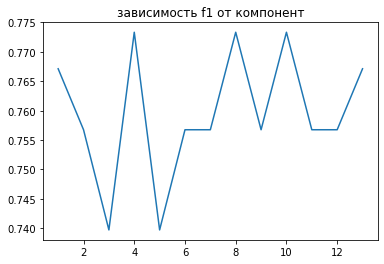

In [142]:
plt.plot(components, scores)
plt.title('зависимость f1 от компонент');

In [119]:
max(scores)

0.7733333333333332

In [76]:
scores = np.array(scores)
components = np.array(components)
components[scores == scores.max()]

array([ 4,  8, 10])

In [125]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=4)
X_train_st_c1 = pca_1.fit_transform(X_train_st)
X_test_st_c1 = pca_1.transform(X_test_st)

In [126]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_c1, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [127]:
y_pred = classifier.predict(X_test_st_c1)

In [128]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 15],
       [ 2, 29]], dtype=int64)

In [130]:
f1_score(y_test, y_pred)

0.7733333333333332

In [143]:
# 2

In [131]:
corr = X.corr().abs()

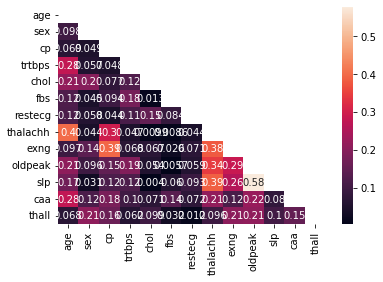

In [132]:
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g');

In [133]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
upper

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,NaN,0.098447,0.068653,0.279351,0.213678,0.121308,0.116211,0.398522,0.096801,0.210013,0.168814,0.276326,0.068001
sex,NaN,NaN,0.049353,0.056769,0.197912,0.045032,0.058196,0.044020,0.141664,0.096093,0.030711,0.118261,0.210041
cp,NaN,NaN,NaN,0.047608,0.076904,0.094444,0.044421,0.295762,0.394280,0.149230,0.119717,0.181053,0.161736
trtbps,NaN,NaN,NaN,NaN,0.123174,0.177531,0.114103,0.046698,0.067616,0.193216,0.121475,0.101389,0.062210
chol,NaN,NaN,NaN,NaN,NaN,0.013294,0.151040,0.009940,0.067023,0.053952,0.004038,0.070511,0.098803
fbs,NaN,NaN,NaN,NaN,NaN,NaN,0.084189,0.008567,0.025665,0.005747,0.059894,0.137979,0.032019
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044123,0.070733,0.058770,0.093045,0.072042,0.011981
thalachh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.378812,0.344187,0.386784,0.213177,0.096439
exng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.288223,0.257748,0.115739,0.206754
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577537,0.222682,0.210244


In [134]:
to_drop = [column for column in upper.columns if any(upper[column]>0.4)]
to_drop

['slp']

In [135]:
X = X.drop(to_drop, axis=1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [137]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [138]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [139]:
y_pred = classifier.predict(X_test_st)

In [140]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 13],
       [ 4, 27]], dtype=int64)

In [141]:
f1_score(y_test, y_pred)

0.7605633802816901